In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.linalg import svd
from sklearn.metrics import mean_squared_error


In [29]:
# Load the image
image_path = '/content/AndresFelipeOrrego.jpg'
my_photo = io.imread(image_path)

In [30]:
# Apply SVD
U, S, VT = svd(my_photo)

In [35]:
# Initialize an array to store reconstruction errors
errors = []

# Set the number of singular values to retain
num_singular_values = 5

while num_singular_values < len(S):
    # Reconstruct the image with a subset of singular values
    reconstructed_image = U[:, :num_singular_values] @ np.diag(S[:num_singular_values]) @ VT[:num_singular_values, :]

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(my_photo, reconstructed_image)

    # Append the error to the list
    errors.append(mse)

    # Increment the number of singular values
    num_singular_values += 1

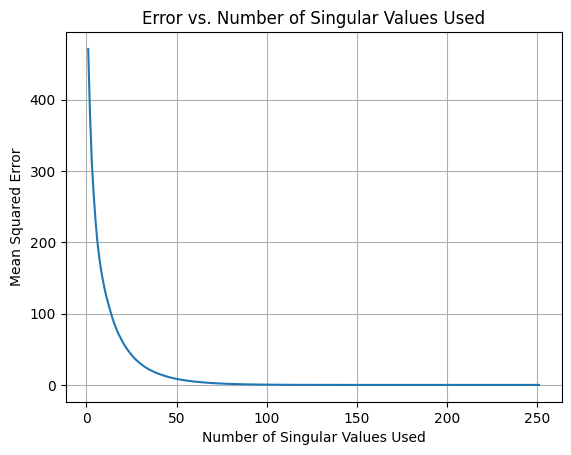

In [36]:
# Plot the error curve
plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel('Number of Singular Values Used')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Number of Singular Values Used')
plt.grid(True)
plt.show()

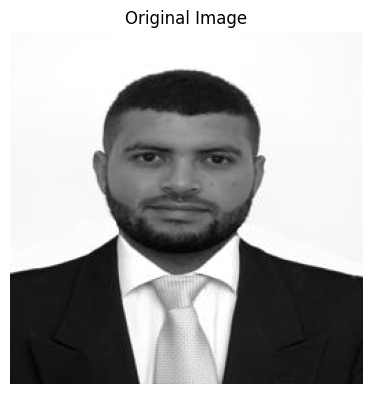

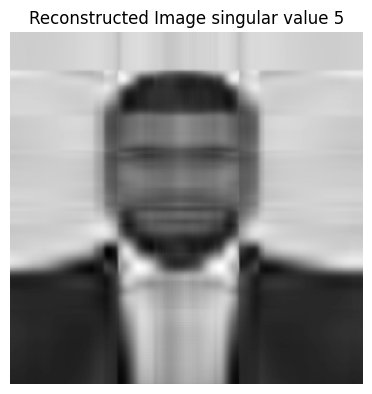

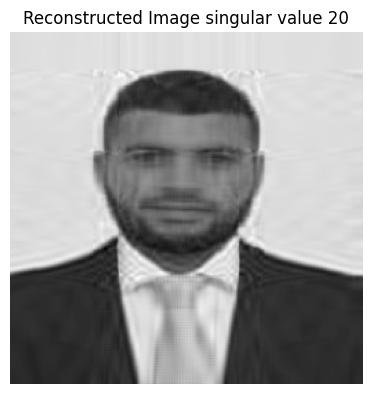

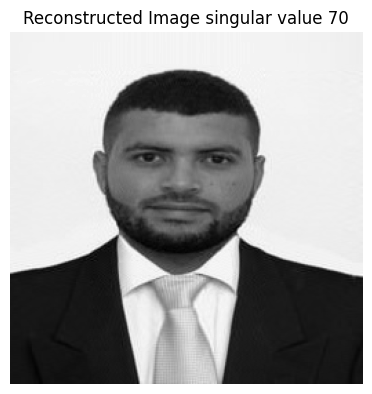

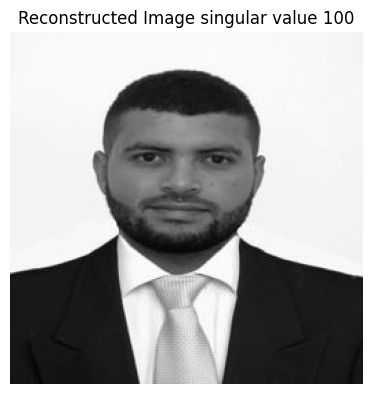

In [50]:
# Choose an appropriate number of singular values based on your analysis
chosen_num_singular_values = [5,20,70,100]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(my_photo, cmap='gray')
plt.title('Original Image')
plt.axis('off')


for i in chosen_num_singular_values:

  # Reconstruct the final image
    final_reconstructed_image = U[:, :i] @ np.diag(S[:i]) @ VT[:i, :]
    title = f"Reconstructed Image singular value {i}"
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 2)
    plt.imshow(final_reconstructed_image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.show()
